# Assignment 7

### MACS 30000, Dr. Evans
### Sixue Liu

Due Monday, Nov. 26 at 11:30 AM

### 1. Unit Testing in Python (3 points).

#### Problem 1
This is the original function: 

In [7]:
def smallest_factor(n):
    '''Return the smallest prime factor of the positive integer n.'''
    if n == 1: return 1
    for i in range(2, int(n**.5)):
        if n % i == 0: return i
    return n

This is the unit test I wrote for this function: 

In [ ]:
import pers

def test_pers_prime():
    assert pers.smallest_factor(7) == 7, "failed on prime number"

def test_pers_even():
    assert pers.smallest_factor(8) == 2, "failed on even number"

def test_pers_odd():
    assert pers.smallest_factor(9) == 3, "failed on odd number"

This is the result I got after running py.test:
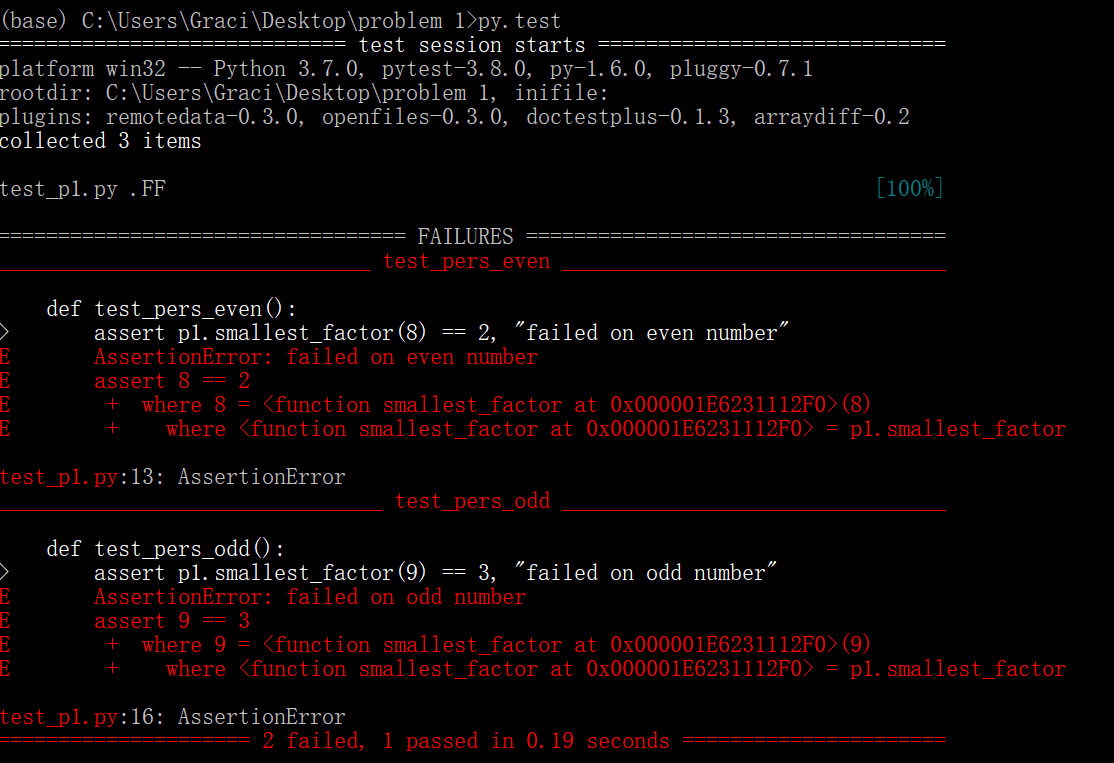

In [ ]:
#This is the function after correcting:
def smallest_factor(n):
"""Return the smallest prime factor of the positive integer n."""
    if n == 1: return 1
    for i in range(2, int(n**.5) + 1):
        if n % i == 0: return i
    return n

This is the new result I got after running the py.test:
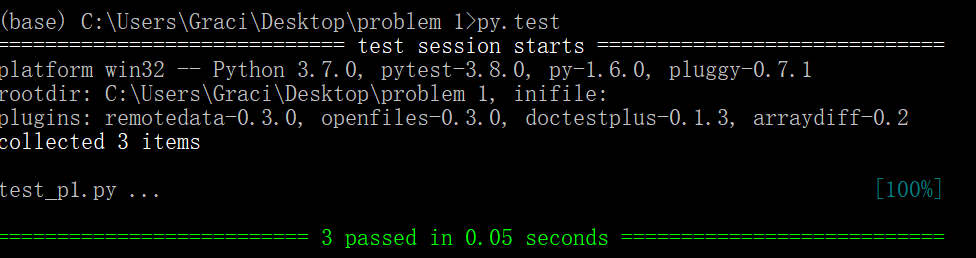

Answer description:
The reason why the original function cannot pass the test is 'range' in Python only includes the lower bound. In this case, 'i' needs to iterate from the lower bound to the upper bound, inclusively. The original function doesn't include the upper bound. Therefore, the way to fix this is to add 1 to the upper bound, now 'i' could also iterate the upper bound. 

#### Problem 2 
This is the result coverage of problem 1:
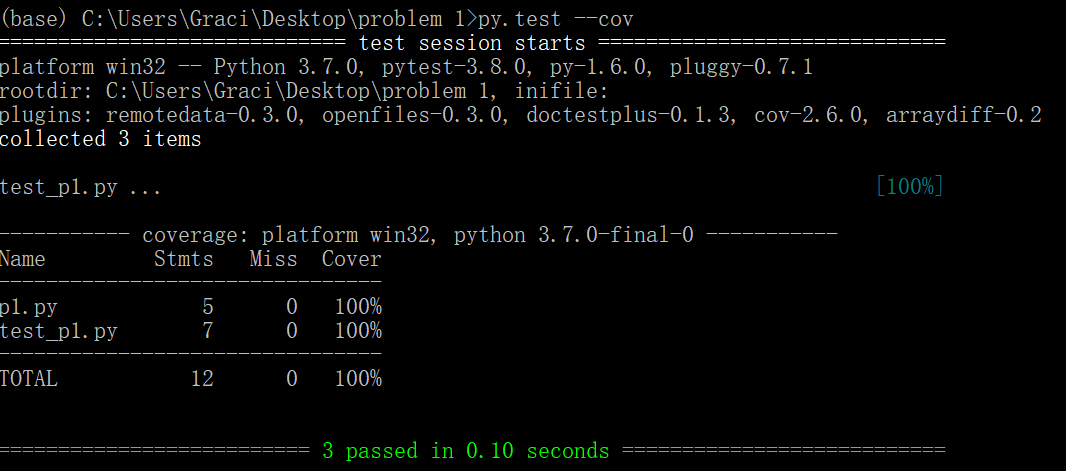

In [1]:
#This is the function of problem 2
def month_length(month, leap_year=False):
    """Return the number of days in the given month."""
    if month in {"September", "April", "June", "November"}:
        return 30
    elif month in {"January", "March", "May", "July",
                        "August", "October", "December"}:
        return 31
    if month == "February":
        if not leap_year:
            return 28
        else:
            return 29
    else:
        return None

In [2]:
#This is the test function I wrote for problem 2
import p2

def test_p2_month():
    assert p2.month_length('January') == 31, "failed on January"
    assert p2.month_length('April') == 30, "failed on April"
    assert p2.month_length('February', leap_year=True) == 29, "failed on February_leap_year"
    assert p2.month_length('February', leap_year=False) == 28, "failed on February_not_leap_year"
    assert p2.month_length('Other') == None, "failed on other_cases"

ModuleNotFoundError: No module named 'p2'

This is the result after running py.test and py.test --cov:
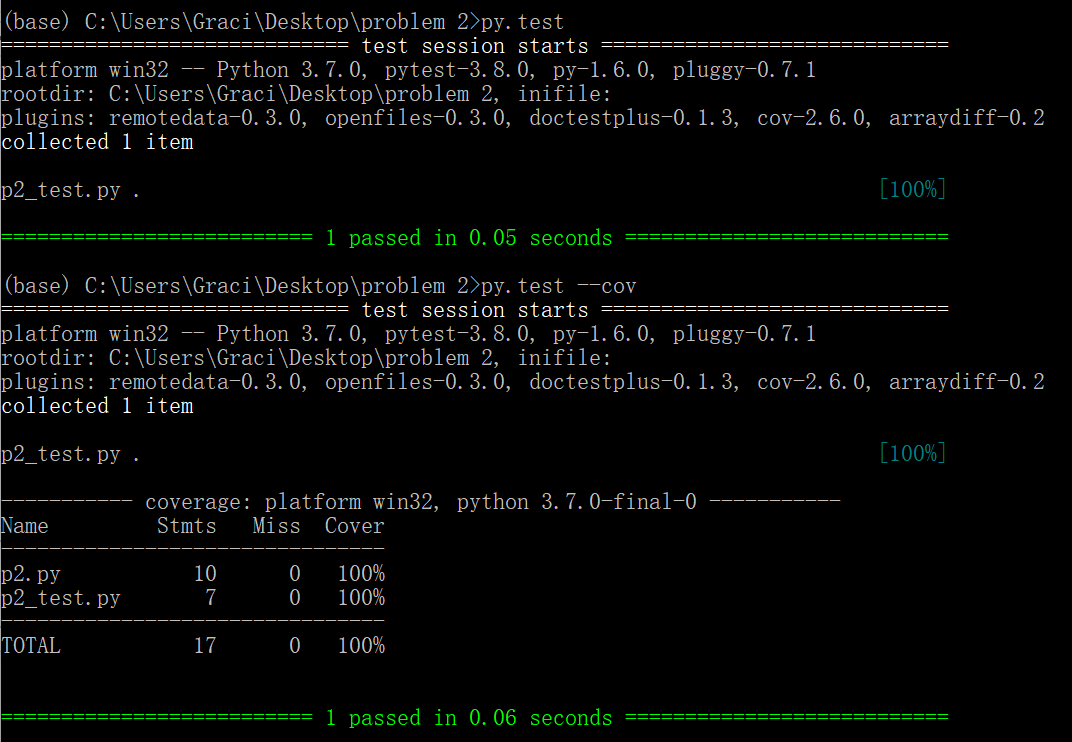

Answer Description: 
The code in problem 2 has several different cases. Generally, we need to consider the months with 30 days and others with 31 days. Also, February is a special case. The length of February depends on whether it is the leap year or not. Therefore, I need to design the test code for both cases. Also, if the input is other word, we need to test if the result is None.  

#### Problem 3

In [ ]:
#This is the function from problem 3
def operate(a, b, oper):
    """Apply an arithmetic operation to a and b."""
    if type(oper) is not str:
        raise TypeError("oper must be a string")
    elif oper == '+':
        return a + b
    elif oper == '-':
        return a - b
    elif oper == '*':
        return a * b
    elif oper == '/':
        if b == 0:
            raise ZeroDivisionError("division by zero is undefined")
        return a / b
    raise ValueError("oper must be one of '+', '/', '-', or '*'")

In [ ]:
#This is the unit test I wrote for problem 3
import pytest
import p3

def test_p3():
    assert p3.operate(4, 2, '+') == 6, "failed on addition"
    assert p3.operate(2, 4, '-') == -2, "failed on subtraction"
    assert p3.operate(4, 2, '*') == 8, "failed on multiplication"
    assert p3.operate(9, 3, '/') == 3, "failed on division"
    with pytest.raises(TypeError) as excinfo1:
        p3.operate(4, 0, 8)
    assert excinfo1.value.args[0] == "oper must be a string"
    with pytest.raises(ZeroDivisionError) as excinfo2:
        p3.operate(4, 0, '/')
    assert excinfo2.value.args[0] == "division by zero is undefined"
    with pytest.raises(ValueError) as excinfo3:
        p3.operate(4, 0, '&')
    assert excinfo3.value.args[0] == "oper must be one of '+', '/', '-', or '*'"

This is the result after running py.test:
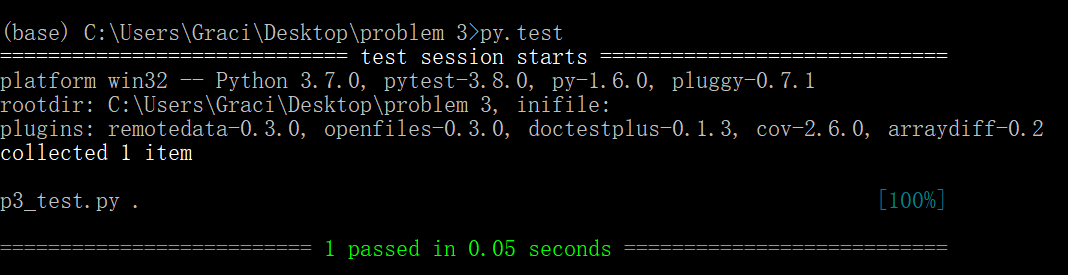

This is the result after running py.test --cov:
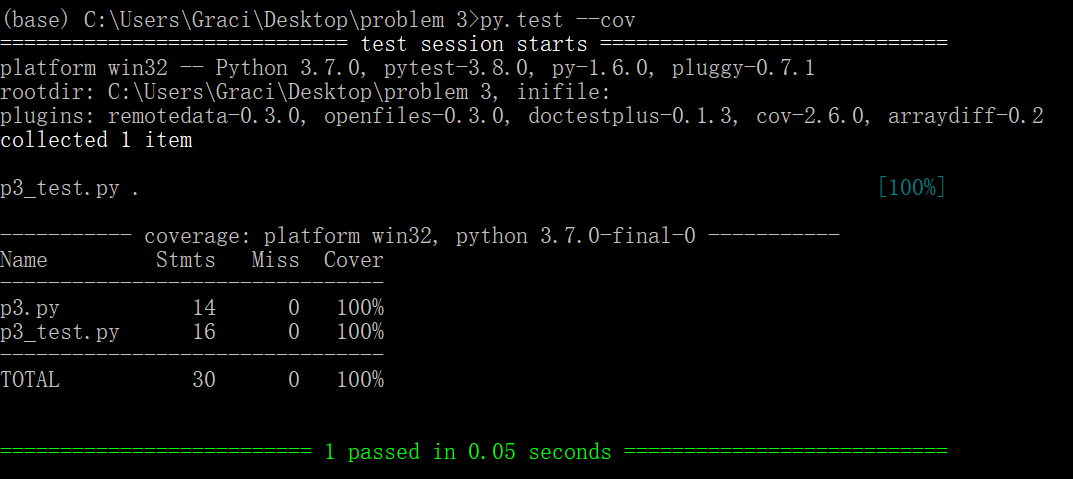

This is the result using cov-report tool to confirm that I have full coverage of this function:
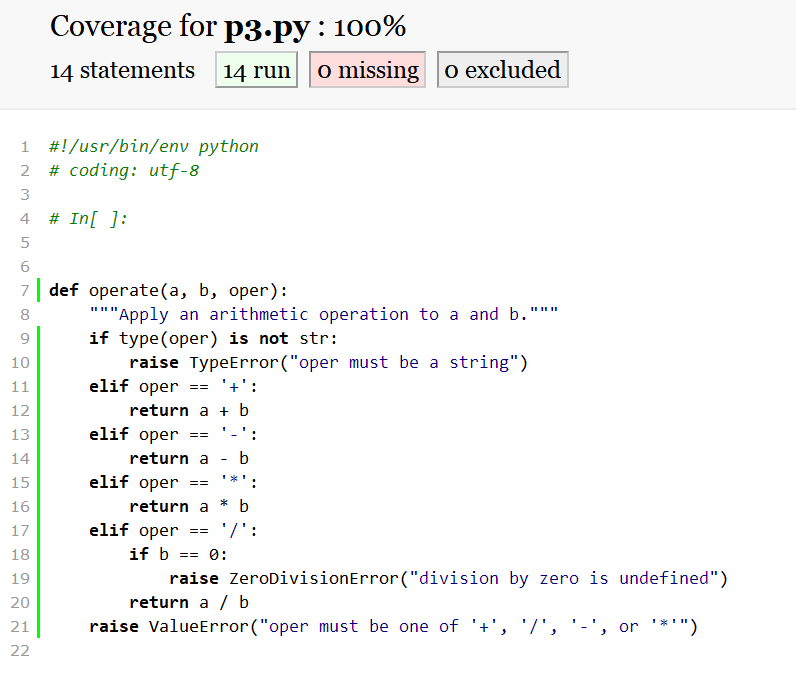

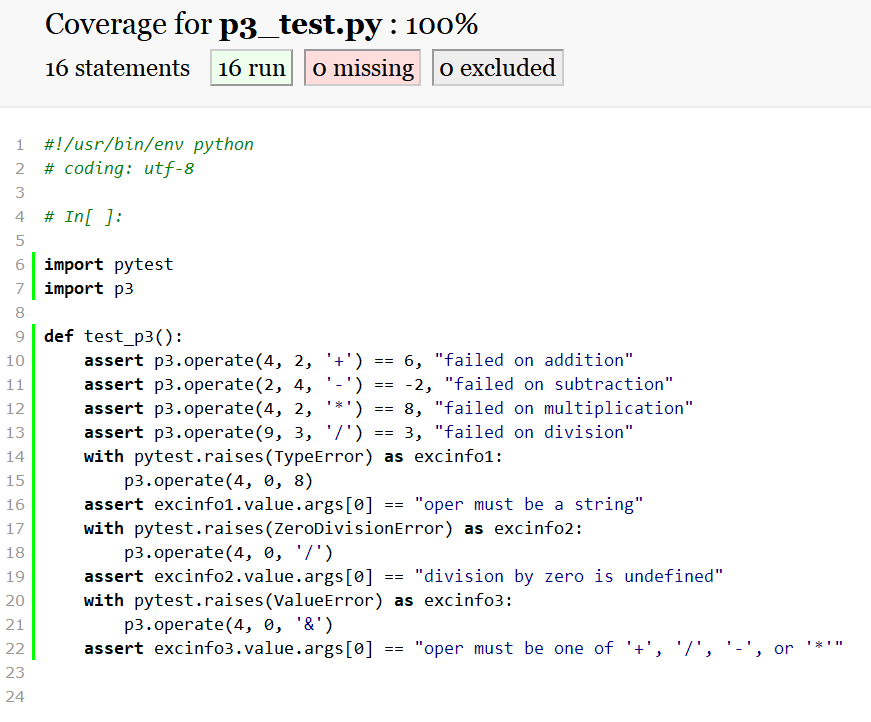

Answer Description:
In the operate function, it raises three different errors: TypeError, ZeroDivisionError and ValueError. Therefore, not only do we need to consider four common situations like addition, subtraction, multiplication and division, but we should include the situations raising these three errors. In raising three errors, the error message should be the same with the original function.

### 2. Test driven development (3 points). 

In [2]:
#This is the Python module:
import numpy as np 

def get_r(K, L, alpha, Z, delta):
    '''
    This function generates the interest rate or vector of interest rates
    '''
    assert alpha > 0 and alpha < 1,"failed on the range of capital share"
    assert delta >= 0 and delta < 1,"failed on the range of depreciation rate"
    assert Z > 0,"failed on the range of total factor productivity"

    r = alpha * Z * ( (L / K) ** (1 - alpha) ) - delta

    if (type(K) == float) and (type(L)== float):
        assert type(r)==float, "failed on 'if K and L are both scalars,this function should return a scalar interest rate'"

    if not np.isscalar(K) and not np.isscalar(L):
        assert not np.isscalar(r), "failed on 'if K and L are both vectors, this function should return a corresponding vector of interest rates'"
    
    return r

This is the result after running py.test:
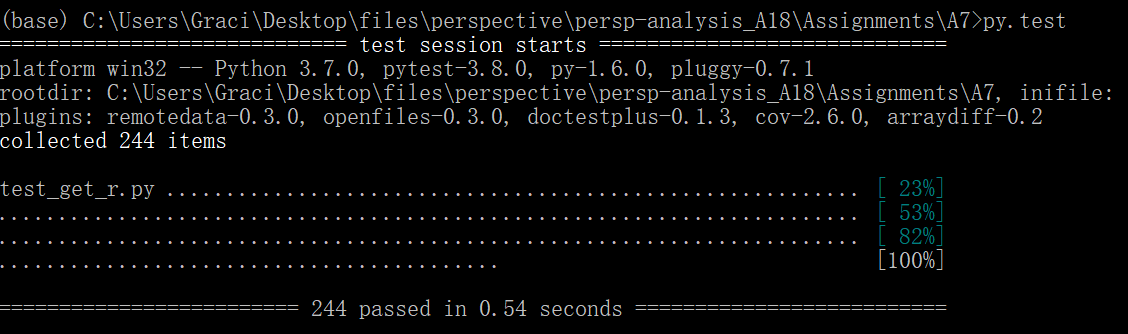

This is the result after running py.test --cov:
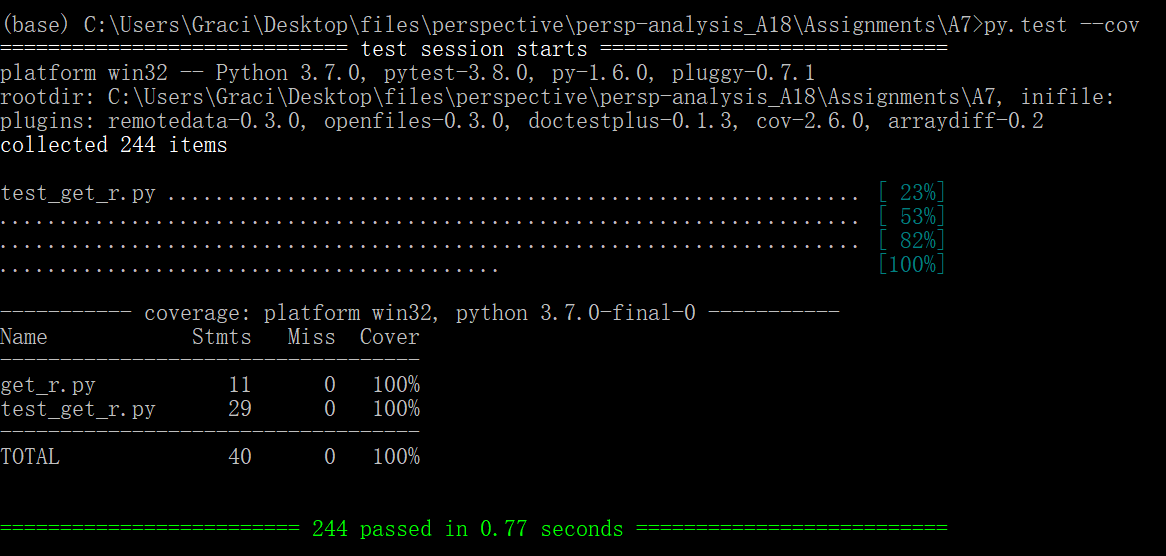

As we can see, the function I wrote passes all the tests and get fully covered. 